In [80]:
!apt_get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/nanum
!rm -rf ~/.cache/matplotlib > /dev/null

/bin/bash: apt_get: command not found


In [81]:
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')

In [82]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image   # 그림을 불러오는 패키지
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

In [83]:
import requests
from bs4 import BeautifulSoup
# import time
# from selenium import webdriver
# from selenium.webdriver.common.keys import Keys
# from selenium.webdriver.common.by import By

import pandas as pd
from urllib.parse import quote
from tqdm.notebook import tqdm
import folium, json

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

from tqdm import tqdm

In [84]:
! pip install konlpy > /dev/null

In [85]:
from konlpy.tag import Okt, Kkma, Komoran

In [86]:
okt = Okt()
kkma = Kkma()
kr = Komoran()

In [87]:
text = '열심히 코딩한 당신, 연휴에는 여행을 떠나 보세요.'

In [88]:
# 한글 형태소 분석기별 차이점
print(okt.morphs(text))
print(kkma.morphs(text))
print(kr.morphs(text))

['열심히', '코딩', '한', '당신', ',', '연휴', '에는', '여행', '을', '떠나', '보세요', '.']
['열심히', '코딩', '하', 'ㄴ', '당신', ',', '연휴', '에', '는', '여행', '을', '떨', '나', '보', '세요', '.']
['열심히', '코', '딩', '하', 'ㄴ', '당신', ',', '연휴', '에', '는', '여행', '을', '떠나', '아', '보', '시', '어요', '.']


In [89]:
# 품사 태깅 pos(part-of-speech tagging)
# http://kkma.snu.ac.kr/documents/?doc=postag
print(okt.pos(text))
print(kkma.pos(text))
print(kr.pos(text))

[('열심히', 'Adverb'), ('코딩', 'Noun'), ('한', 'Josa'), ('당신', 'Noun'), (',', 'Punctuation'), ('연휴', 'Noun'), ('에는', 'Josa'), ('여행', 'Noun'), ('을', 'Josa'), ('떠나', 'Verb'), ('보세요', 'Verb'), ('.', 'Punctuation')]
[('열심히', 'MAG'), ('코딩', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('당신', 'NP'), (',', 'SP'), ('연휴', 'NNG'), ('에', 'JKM'), ('는', 'JX'), ('여행', 'NNG'), ('을', 'JKO'), ('떨', 'VV'), ('나', 'ECE'), ('보', 'VXV'), ('세요', 'EFN'), ('.', 'SF')]
[('열심히', 'MAG'), ('코', 'NNG'), ('딩', 'MAG'), ('하', 'XSV'), ('ㄴ', 'ETM'), ('당신', 'NNP'), (',', 'SP'), ('연휴', 'NNG'), ('에', 'JKB'), ('는', 'JX'), ('여행', 'NNG'), ('을', 'JKO'), ('떠나', 'VV'), ('아', 'EC'), ('보', 'VV'), ('시', 'EP'), ('어요', 'EF'), ('.', 'SF')]


명사만 추출

In [90]:
print(okt.nouns(text))
print(kkma.nouns(text))
print(kr.nouns(text))

['코딩', '당신', '연휴', '여행']
['코딩', '당신', '연휴', '여행']
['코', '당신', '연휴', '여행']


Crawling

In [91]:
headers = {
   'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36'
}

In [92]:
url = 'https://www.hanbit.co.kr/academy/books/new_book_list.html'

In [93]:


 url_page = f'https://www.hanbit.co.kr/academy/books/new_book_list.html?page={i}&cate_cd=&srt=&searchKey=&keyWord='

In [94]:
for i in range(1,11):
  url_page = f'https://www.hanbit.co.kr/academy/books/new_book_list.html?page={i}&cate_cd=&srt=&searchKey=&keyWord='
  response = requests.get(url_page, headers = headers)
  soup = BeautifulSoup(response.text, 'html.parser')
  

In [95]:
response = requests.get(url, headers = headers)

In [96]:
soup = BeautifulSoup(response.text, 'html.parser')
soup

<!DOCTYPE html>

<html lang="ko">
<head>
<!--[if lte IE 8]>
<script>
  location.replace('/support/explorer_upgrade.html');
</script>
<![endif]-->
<meta charset="utf-8"/>
<title>한빛아카데미</title>
<link href="https://www.hanbit.co.kr/images/common/hanbit.ico" rel="shortcut icon"/>
<meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
<meta content="website" property="og:type"/>
<meta content="한빛아카데미" property="og:title"/>
<meta content="이공계 분야 종합 교재 출판사로, 독자의 신뢰를 최우선 원칙으로 삼고 가르치는 교수님들과 배우는 학생들에게 든든한 조력자가 되도록 노력하고 있습니다." property="og:description"/>
<meta content="https://www.hanbit.co.kr/images/hanbitpubnet_logo.jpg" property="og:image"/>
<meta content="https://www.hanbit.co.kr/academy/books/new_book_list.html" property="og:url"/>
<link href="https://www.hanbit.co.kr/academy/books/new_book_list.html" rel="canonical">
<meta content="한빛아카데미,책,전자책,ebook,대학교재,교재출판사,강의교안,교수회원,자격증,정보교과서" name="keywords"/>
<meta content="이공계 분야 종합 교재 출판사로, 독자의 신뢰를 최우선 원칙으로 삼고 가르치는 교수님들과 배우는 학생들에게 든든한 조력자가 되도록 노력하고

In [97]:
type(soup)

bs4.BeautifulSoup

In [98]:
book_list = soup.find_all('li', attrs = {'class', 'sub_book_list'})
book_list

[<li class="sub_book_list">
 <div class="view_box">
 <span class="view_box_block">
 <span class="img_hidden_a">
 <span class="pop_quick_menu">
 <a href="/academy/books/book_view.html?p_code=B7192437175"><img alt="상세보기" src="https://www.hanbit.co.kr/images/common/icon_view_detail.png"/></a>
 </span>
 <span class="price">30,000<span>원</span></span>
 <span class="pop_quick_bg" onclick="location='/academy/books/book_view.html?p_code=B7192437175'"></span>
 </span>
 <!-- 예약도서인 경우 -->
 <!-- ebook이 도서인 경우 -->
 <img alt="" class="thumb" src="/data/books/B7192437175_m.jpg"/>
 </span>
 <div class="info">
 <p class="book_tit"><a href="/academy/books/book_view.html?p_code=B7192437175">처음 배우는 매트랩</a></p>
 <p class="book_writer">방성완 </p>
 </div>
 </div>
 </li>,
 <li class="sub_book_list">
 <div class="view_box">
 <span class="view_box_block">
 <span class="img_hidden_a">
 <span class="pop_quick_menu">
 <a href="/academy/books/book_view.html?p_code=B9111135793"><img alt="상세보기" src="https://www.hanbit.

In [99]:
len(book_list)

20

In [100]:
book_list[0].find('p', attrs = {'class', 'book_tit'}).get_text()

'처음 배우는 매트랩'

In [101]:
title_list = []
for i in tqdm(range(1,11)):
  url_page = f'https://www.hanbit.co.kr/academy/books/new_book_list.html?page={i}&cate_cd=&srt=&searchKey=&keyWord='
  response = requests.get(url_page, headers = headers)
  soup = BeautifulSoup(response.text, 'html.parser')
  book_list = soup.find_all('li', attrs = {'class', 'sub_book_list'})
  for j in range(20):
    title_list.append(book_list[j].find('p', attrs = {'class', 'book_tit'}).get_text())



100%|██████████| 10/10 [00:15<00:00,  1.53s/it]


In [102]:
title_list

['처음 배우는 매트랩',
 'SAS와 메타분석을 활용한 한번에 적용하는 의학보건통계',
 '정보교과교육론(3판)',
 'IT CookBook, 기초전자실험 with PSpice(3판)',
 '경제수학 강의(3판)',
 '글로벌 사회와 리더십(2판)',
 '행동 재무론',
 'IT CookBook, 알기 쉽게 해설한 파이썬 with 컴퓨팅 사고력',
 'MATLAB으로 배우는 공학 수치해석(3판)',
 'Cengel의 알기 쉬운 열역학(6판)',
 'Cengel의 알기 쉬운 열전달(6판)',
 'IT CookBook, 알기 쉽게 해설한 자바 프로그래밍(10판)',
 'IT CookBook, 비즈니스 애널리틱스를 위한 데이터 마이닝',
 '현대경영과학(9판)',
 'IT CookBook, 네트워크 해킹과 보안(4판)',
 'IT CookBook, 쉽게 배우는 운영체제(2판)',
 'IT CookBook, Android Studio를 활용한 안드로이드 프로그래밍(8판)',
 'STEM CookBook, 전기 및 하이브리드 자동차(3판)',
 'IT CookBook, 컴퓨터 비전과 딥러닝',
 '리더십 : 이론과 실제 (9판)',
 'IT CookBook, JAVA 마스터',
 'IT CookBook, 데이터 과학을 위한 파이썬 프로그래밍(2판)',
 'IT CookBook, 생활 속 예제로 배우는 생생 데이터 분석',
 'IT CookBook, 파워포인트 2019',
 '메타버스로 구현하는 나만의 세상',
 '국제경영학 : 환경과 운영 (17판)',
 '머신러닝을 위한 수학',
 '위상수학 첫걸음',
 'IT CookBook, 전자기학 : ELECTROMAGNETICS (2판)',
 '반도체 특강 : 소자편',
 'IT CookBook, 처음 만나는 자동제어공학(2판)',
 '누구나 R 데이터 분석',
 'STEM CookBook, 정수론 첫걸음',
 'IT CookBook, C# 프로그래밍 for Beginner',
 'R과 jamovi를 활용한 한번에 적용하는

In [103]:
print(type(title_list))

<class 'list'>


In [104]:
text = ' '.join(title_list)
text

'처음 배우는 매트랩 SAS와 메타분석을 활용한 한번에 적용하는 의학보건통계 정보교과교육론(3판) IT CookBook, 기초전자실험 with PSpice(3판) 경제수학 강의(3판) 글로벌 사회와 리더십(2판) 행동 재무론 IT CookBook, 알기 쉽게 해설한 파이썬 with 컴퓨팅 사고력 MATLAB으로 배우는 공학 수치해석(3판) Cengel의 알기 쉬운 열역학(6판) Cengel의 알기 쉬운 열전달(6판) IT CookBook, 알기 쉽게 해설한 자바 프로그래밍(10판) IT CookBook, 비즈니스 애널리틱스를 위한 데이터 마이닝 현대경영과학(9판) IT CookBook, 네트워크 해킹과 보안(4판) IT CookBook, 쉽게 배우는 운영체제(2판) IT CookBook, Android Studio를 활용한 안드로이드 프로그래밍(8판) STEM CookBook, 전기 및 하이브리드 자동차(3판) IT CookBook, 컴퓨터 비전과 딥러닝 리더십 : 이론과 실제 (9판) IT CookBook, JAVA 마스터 IT CookBook, 데이터 과학을 위한 파이썬 프로그래밍(2판) IT CookBook, 생활 속 예제로 배우는 생생 데이터 분석 IT CookBook, 파워포인트 2019 메타버스로 구현하는 나만의 세상 국제경영학 : 환경과 운영 (17판) 머신러닝을 위한 수학 위상수학 첫걸음 IT CookBook, 전자기학 : ELECTROMAGNETICS (2판) 반도체 특강 : 소자편 IT CookBook, 처음 만나는 자동제어공학(2판) 누구나 R 데이터 분석 STEM CookBook, 정수론 첫걸음 IT CookBook, C# 프로그래밍 for Beginner R과 jamovi를 활용한 한번에 적용하는 의학보건통계 글로벌 시장환경과 국제경영 미래 세상의 모빌리티 IT CookBook, 처음 만나는 전력공학(2판) 경영경제 통계학 4판 : Excel과 R의 실전적 활용 4차 산업혁명 시대의 국제마케팅(8판) 스마트 물류 비즈니스를 위한 글로벌 

In [105]:
wc = WordCloud(background_color = 'white', max_words = 100000)
wc = wc.generate(text)

In [106]:
count = 0
for key, value in wc.words_.items():
  print(key, ':', value)
  count += 1
  if count > 10:
    break

CookBook : 1.0
2판 : 0.3522727272727273
위한 : 0.2159090909090909
프로그래밍 : 0.20454545454545456
3판 : 0.17045454545454544
STEM CookBook : 0.1590909090909091
파이썬 : 0.14772727272727273
4판 : 0.13636363636363635
배우는 : 0.125
데이터 : 0.07954545454545454
컴퓨터 : 0.07954545454545454


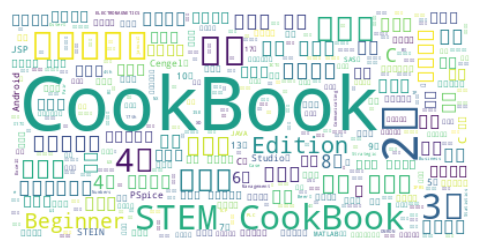

In [107]:
plt.figure(figsize = (7, 3))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

# Tag

In [108]:
# see the lecture